In [36]:
require 'torch'
require 'paths'

In [37]:
mnist = {}
mnist.path_remote = 'https://s3.amazonaws.com/torch7/data/mnist.t7.tgz'
mnist.path_dataset = 'mnist.t7'
mnist.path_trainset = paths.concat(mnist.path_dataset, 'train_32x32.t7')
mnist.path_testset = paths.concat(mnist.path_dataset, 'test_32x32.t7')

In [38]:
function mnist.download()
   if not paths.filep(mnist.path_trainset) or not paths.filep(mnist.path_testset) then
      local remote = mnist.path_remote
      local tar = paths.basename(remote)
      os.execute('wget ' .. remote .. '; ' .. 'tar xvf ' .. tar .. '; rm ' .. tar)
   end
end

In [1]:
function mnist.loadDataset(fileName, maxLoad)
    mnist.download()
    local f = torch.load(fileName, 'ascii')
    local data = f.data:type(torch.getdefaulttensortype())
    local labels = f.labels

    local nExample = f.data:size(1)
    if maxLoad and maxLoad > 0 and maxLoad < nExample then
      nExample = maxLoad
      print('<mnist> loading only ' .. nExample .. ' examples')
    end
    data = data[{{1,nExample},{},{},{}}]
    labels = labels[{{1,nExample}}]
    print('<mnist> done')

    local dataset = {}
    dataset.data = data
    dataset.labels = labels
    dataset.std = data:std()
    dataset.mean = data:mean()

    -- normalization
    data:add(-dataset.mean)
    data:mul(1/data:std())

    function dataset:recover(img)
        img:mul(data:std())
        img:add(dataset.mean)
        return img
    end

    function dataset:size()
      return nExample
    end

    local labelvector = torch.zeros(10)
    setmetatable(dataset, {__index = 
            function(self, index)
                local input = self.data[index]
                local class = self.labels[index]
                local label = labelvector:zero()
                label[class] = 1
                local example = {input, label}
                return example
            end})
    return dataset
end

In [2]:
function mnist.loadTrainSet(maxLoad)
   return mnist.loadDataset(mnist.path_trainset, maxLoad)
end

function mnist.loadTestSet(maxLoad, geometry)
   return mnist.loadDataset(mnist.path_testset, maxLoad)
end

In [3]:
trainSet = mnist.loadTrainSet()

<mnist> done	


In [6]:
print(trainSet[1][1])

(1,.,.) = 
 Columns 1 to 9
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635

2415  3.2415  3.2415  3.2415  2.4578
  2.0731  2.7570  3.2415  3.2415  3.2415  3.2415  2.4151  0.7764 -0.2352
  3.2415  3.2415  3.2415  3.2415  3.1133  1.5316 -0.2067 -0.3635 -0.3635
  3.2415  2.6573  1.5601  1.5174 -0.1355 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635

Columns 19 to 27
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635 -0.3

635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
 -0.3635 -0.3635 -0.3635 -0.3635 -0.3635
[torch.DoubleTensor of size 1x32x32]



In [8]:
print(trainSet:recover(trainSet[1][1]))

(1,.,.) = 
 Columns 1 to 8
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7

 53.8430  54.4161  54.4161  54.4161
  51.0494  53.2413  53.9290  54.4161  54.4161  54.4161  54.4161  53.5851
  54.0293  54.4161  54.4161  54.4161  54.4161  54.2871  52.6969  50.9491
  54.4161  54.4161  53.8287  52.7256  52.6826  51.0208  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915

Columns 17 to 24
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.79

  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915
  50.7915  50.7915  50.7915  50.7915  50.7915  50.7915  50.7

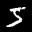

In [5]:
itorch.image(trainSet[1][1])

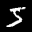

In [7]:
itorch.image(trainSet:recover(trainSet[1][1]))